# Chlorophyll Project - NAN Method
#### There are seventy seabird observational sites across the globe. We want to gather chlorophyll data for a 1km diameter around these points, in a circle.
#### This method will use a distance function to only render points within a 300km diameter range around any seabird site.

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [2]:
# make a function (called below) that makes a mask (2d dataset where values to retain are set to 1 and others to nan)
# for a 300km radius area around a given lat/lon pair. 
# note that the area in km is not the same as area in degrees. longitude degrees change distance with latitude.

In [3]:
# if acquiring for the first time (1)
ds_color = xr.open_dataset('https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v5.0-MONTHLY')

In [4]:
# open CSV
locs = pd.read_csv('../NSF_Seabirdsloc_Summer2022.csv')
sites = locs['Site']

# for now, let's take an input. later it will be a function
site = input("Input Desired Site")
if (site == ""):
    site = 'Adams'
sites = sites.tolist()

lon = locs.loc[[sites.index(site)]]['Longitude']
lat = locs.loc[[sites.index(site)]]['Latitude']

print("Working site " + site)

Working site Alcatraz


Mapping between 35.12467 and 40.52867
Mapping between -125.12533 and -119.72133000000001
Iterating on unit with distance 5479.6535686798925
Iterating on unit with distance 2037.0296141650101
Iterating on unit with distance 1006.9835120110171
Iterating on unit with distance 5842.3554334821365
Iterating on unit with distance 8169.019639961142
Iterating on unit with distance 14072.369530053615


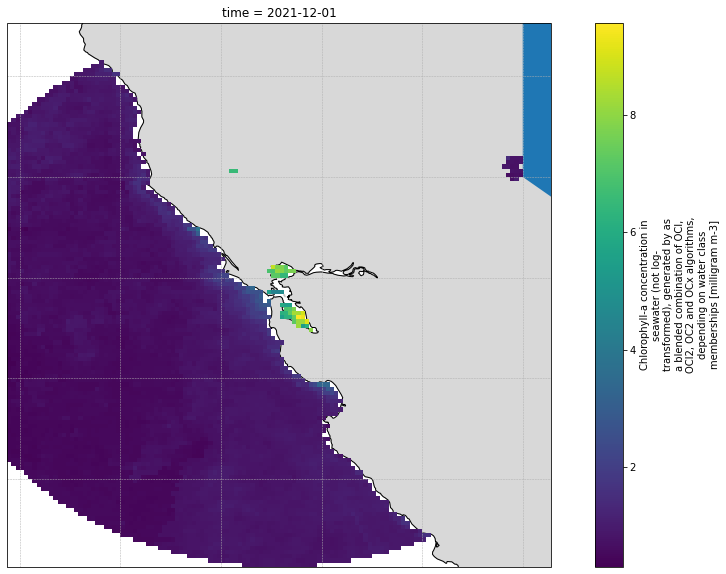

In [11]:
# open CSV
# for each location, select a region +-5 deg, all times
dist = 2.702; # 300 km range
lats = [float(lat-dist), float(lat+dist)]
lons = [float(lon-dist), float(lon+dist)]

data = ds_color['chlor_a'][291].sel(
    lon = slice(lons[0], lons[1]),
).load()

# Select a region of our data
fig = plt.figure(figsize=(16,10), dpi = 72)
ax = plt.axes(projection=ccrs.PlateCarree())


region = np.array([[lats[0],lats[1]],[lons[0],lons[1]]]) 

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.coastlines(resolution='10m',linewidth=1,color='black')
ax.add_feature(cfeature.LAND, color='grey', alpha=0.3)
ax.add_feature(states_provinces, linewidth = 0.5)
ax.add_feature(cfeature.BORDERS, color = 'black')
ax.set_extent([region[1,0],region[1,1],region[0,0],region[0,1]],crs=ccrs.PlateCarree()) 
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(linestyle = '--', linewidth = 0.5)

#plot diff data
plt.title("Seabird Observation Locations")

#print lats and lons range
print("Mapping between " + str(lats[0]) + " and " + str(lats[1]))
print("Mapping between " + str(lons[0]) + " and " + str(lons[1]))

# get the distance between two points of lat,lon in km
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    d = 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...
    if (np.random.randint(0, 100000) == 1):
        print("Iterating on unit with distance " + str(d))
    return d

latPos = lat.values.item()
lonPos = lon.values.item()
# plot values only that are within 300 units of the (lat, lon)
for i in range(len(data.lat)):
    for j in range(len(data.lon)):
        thisLat = data.lat[i].item()
        thisLon = data.lon[j].item()
        if (distance(thisLat, thisLon, latPos, lonPos) >= 300):
           data.values[i][j] = np.nan

data.plot()

# pick a random point in the data, and calculate its distance to the site.

# take a mean in space, and store the time series into a numpy array

# save the arrays as dataarray in a dataset

# add locations as other variables 

plt.show()

In [6]:
# save the file into a netcdf
